In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Customer_Intent/

/content/drive/MyDrive/Customer_Intent


In [76]:
import numpy as np
import pandas as pd

In [77]:
train_path="Bitext_Sample_Customer_Service_Training_Dataset.csv"
test_data="Bitext_Sample_Customer_Service_Testing_Dataset.csv"
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_data)


In [78]:
df_train.columns

Index(['utterance', 'intent', 'category', 'tags'], dtype='object')

In [79]:
df_train.head()

,utterance,intent,category,tags
0,would it be possible to cancel the order I made?,cancel_order,ORDER,BIP
1,cancelling order,cancel_order,ORDER,BK
2,I need assistance canceling the last order I h...,cancel_order,ORDER,B
3,problem with canceling the order I made,cancel_order,ORDER,B
4,I don't know how to cancel the order I made,cancel_order,ORDER,B


In [80]:
df_train.shape[0]

6539

In [81]:
df_test.shape[0]

818

In [82]:
total_samples = df_train.shape[0] + df_test.shape[0]

# Calculate the split ratio
split_ratio = df_train.shape[0] / total_samples

print(f"Split Ratio: {split_ratio * 100}% training, {(1 - split_ratio) * 100}% testing")

Split Ratio: 88.88133750169906% training, 11.118662498300935% testing


In [83]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [84]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [85]:
from nltk import SnowballStemmer
import re

stemmer = SnowballStemmer("english")
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)

    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_text.append(word)
    return " ".join(final_text)


def stemming(text):
    stemmed_text = ""
    for word in text.split():
        stem = stemmer.stem(word)
        stemmed_text += stem
        stemmed_text += " "

    stemmed_text = stemmed_text.strip()
    return stemmed_text
#Total function
def cleaning(text):

    text = remove_punctuations(text)
    text = remove_characters(text)
    text = stemming(text)
    text = remove_stopwords_and_lemmatization(text)

    return text

#Apply function on text column
df_train['utterance']=df_train['utterance'].apply(cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
df_test['utterance']=df_test['utterance'].apply(cleaning)

In [87]:
# Split data into X and y
X_train = df_train["utterance"].values
y_train = df_train["intent"].values
X_test = df_test["utterance"].values
y_test = df_test["intent"].values

from keras.preprocessing.text import Tokenizer
import tensorflow as tf

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 300
X_train = tf.keras.utils.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.utils.pad_sequences(X_test, maxlen=max_len)

from sklearn.preprocessing import LabelEncoder

# Encode categorical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


# **KNN_Algorithm**

In [88]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn_class=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_class.fit(X_train,y_train)
y_pred=knn_class.predict(X_test)
Accuracy_Knn=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_Knn,"%")



Accuracy:  82.15 %


In [89]:
from sklearn.metrics import classification_report
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=[f'class {i}' for i in unique_classes]))

              precision    recall  f1-score   support

     class 0       0.86      0.96      0.91        25
     class 1       0.70      0.72      0.71        39
     class 2       0.85      0.80      0.83        41
     class 3       0.75      0.81      0.78        26
     class 4       0.80      0.90      0.85        31
     class 5       0.92      0.92      0.92        26
     class 6       0.75      0.97      0.85        37
     class 7       0.62      0.65      0.64        23
     class 8       0.70      0.67      0.68        24
     class 9       0.91      0.74      0.82        42
    class 10       0.74      0.56      0.64        25
    class 11       0.88      0.79      0.84        29
    class 12       0.88      0.88      0.88        32
    class 13       0.89      0.89      0.89        38
    class 14       0.89      0.69      0.77        35
    class 15       0.82      0.90      0.86        31
    class 16       0.90      0.96      0.93        28
    class 17       0.80    

# **Decision_Tree**

In [90]:
from sklearn.tree import DecisionTreeClassifier
DT_class=DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_class.fit(X_train, y_train)
y_pred= DT_class.predict(X_test)
Accuracy_DT=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_DT,"%")


Accuracy:  96.82 %


In [91]:
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=[f'class {i}' for i in unique_classes]))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        25
     class 1       0.97      1.00      0.99        39
     class 2       0.98      0.98      0.98        41
     class 3       0.96      0.96      0.96        26
     class 4       1.00      1.00      1.00        31
     class 5       0.96      1.00      0.98        26
     class 6       1.00      1.00      1.00        37
     class 7       0.95      0.87      0.91        23
     class 8       0.92      1.00      0.96        24
     class 9       1.00      0.95      0.98        42
    class 10       0.86      0.72      0.78        25
    class 11       0.86      0.83      0.84        29
    class 12       1.00      1.00      1.00        32
    class 13       1.00      0.97      0.99        38
    class 14       0.95      1.00      0.97        35
    class 15       1.00      1.00      1.00        31
    class 16       1.00      0.96      0.98        28
    class 17       1.00    

# **Random_Forest**

In [92]:
from sklearn.ensemble import RandomForestClassifier
random_class= RandomForestClassifier(n_estimators= 10, criterion="entropy")
random_class.fit(X_train, y_train)
y_pred= random_class.predict(X_test)
Accuracy_RF=round((metrics.accuracy_score(y_test, y_pred)*100),2)
print('Accuracy: ',Accuracy_RF,"%")



Accuracy:  91.32 %


In [93]:
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=[f'class {i}' for i in unique_classes]))

              precision    recall  f1-score   support

     class 0       0.93      1.00      0.96        25
     class 1       0.86      0.92      0.89        39
     class 2       0.98      0.98      0.98        41
     class 3       0.82      0.88      0.85        26
     class 4       0.91      0.97      0.94        31
     class 5       0.89      0.92      0.91        26
     class 6       0.95      0.97      0.96        37
     class 7       0.74      0.74      0.74        23
     class 8       0.88      0.96      0.92        24
     class 9       0.92      0.81      0.86        42
    class 10       0.63      0.76      0.69        25
    class 11       0.82      0.79      0.81        29
    class 12       0.94      1.00      0.97        32
    class 13       0.97      0.97      0.97        38
    class 14       0.94      0.86      0.90        35
    class 15       0.97      0.97      0.97        31
    class 16       1.00      0.96      0.98        28
    class 17       0.89    

# **ANN**

In [104]:
# Define model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(len(label_encoder.classes_), activation="softmax"))

# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

# Evaluate model on test set
loss, acc = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", acc)

Epoch 1/50
103/103 [==============================] - 2s 9ms/step - loss: 3.2739 - accuracy: 0.0477 - val_loss: 3.1747 - val_accuracy: 0.0917
Epoch 2/50
103/103 [==============================] - 1s 7ms/step - loss: 2.9570 - accuracy: 0.0774 - val_loss: 2.7577 - val_accuracy: 0.0844
Epoch 3/50
103/103 [==============================] - 1s 7ms/step - loss: 2.6652 - accuracy: 0.0801 - val_loss: 2.5964 - val_accuracy: 0.1064
Epoch 4/50
103/103 [==============================] - 1s 7ms/step - loss: 2.5145 - accuracy: 0.1256 - val_loss: 2.4436 - val_accuracy: 0.1589
Epoch 5/50
103/103 [==============================] - 1s 8ms/step - loss: 2.3347 - accuracy: 0.1745 - val_loss: 2.1962 - val_accuracy: 0.2237
Epoch 6/50
103/103 [==============================] - 1s 12ms/step - loss: 2.0467 - accuracy: 0.1954 - val_loss: 1.9053 - val_accuracy: 0.2555
Epoch 7/50
103/103 [==============================] - 1s 11ms/step - loss: 1.7462 - accuracy: 0.3161 - val_loss: 1.6181 - val_accuracy: 0.4389
Epoc

In [105]:
model_json=model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [106]:
import tensorflow
from tensorflow.keras.models import model_from_json
json_file1=open('model.json','r')
loaded_model_json=json_file1.read()
json_file1.close()
loaded_model=model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")

print("Loaded model from disk")
loaded_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
score=loaded_model.evaluate(X_test,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

Loaded model from disk
accuracy: 93.40%


# **Data_Visualization**

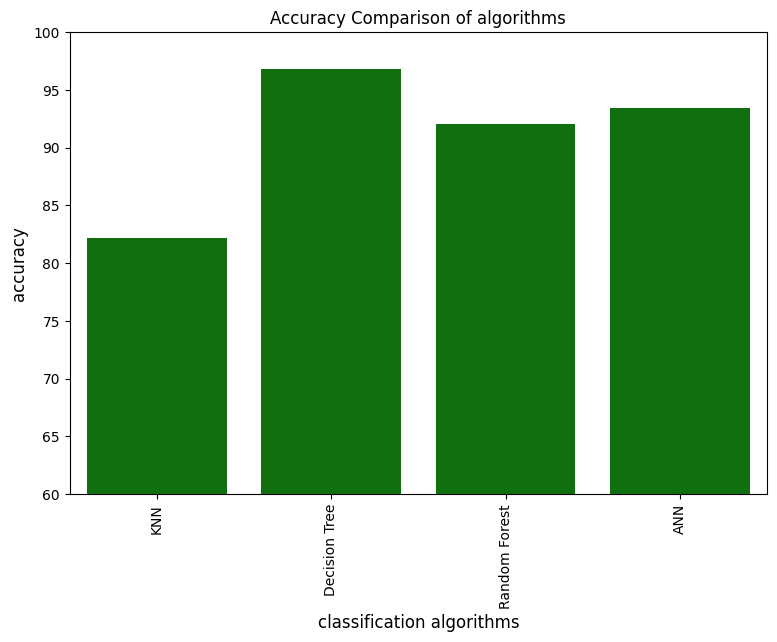

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
acc=[82.15,96.82,92.05,93.40]
alg=['KNN','Decision Tree','Random Forest','ANN']
plt.ylim(60,100)
sns.barplot(x=alg, y=acc,color='green')
plt.xticks(rotation='vertical')
plt.xlabel('classification algorithms', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title("Accuracy Comparison of algorithms")
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

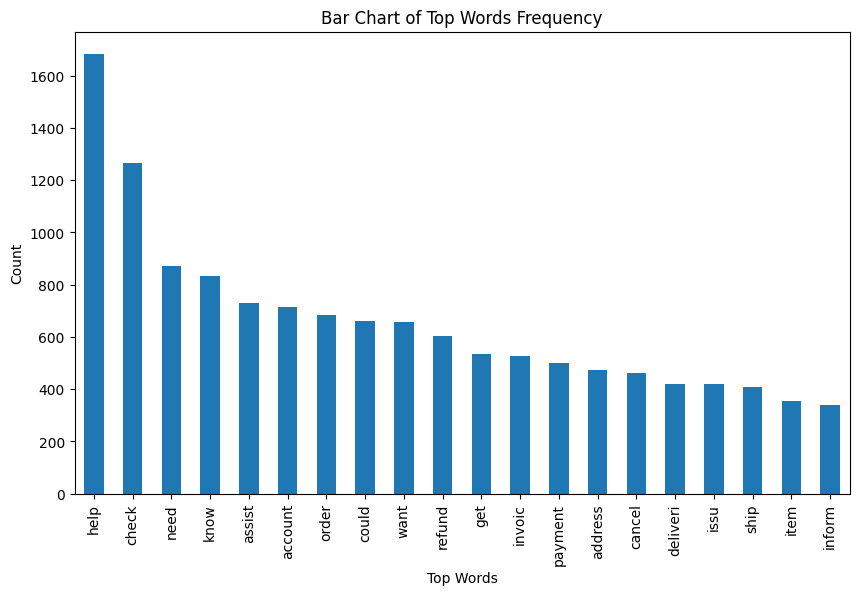

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx])
        for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1],
            reverse=True)
  return words_freq[:n]


common_words = get_top_n_words(df_train['utterance'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar',figsize=(10, 6), xlabel="Top Words", ylabel="Count", title="Bar Chart of Top Words Frequency")

# **EDA**

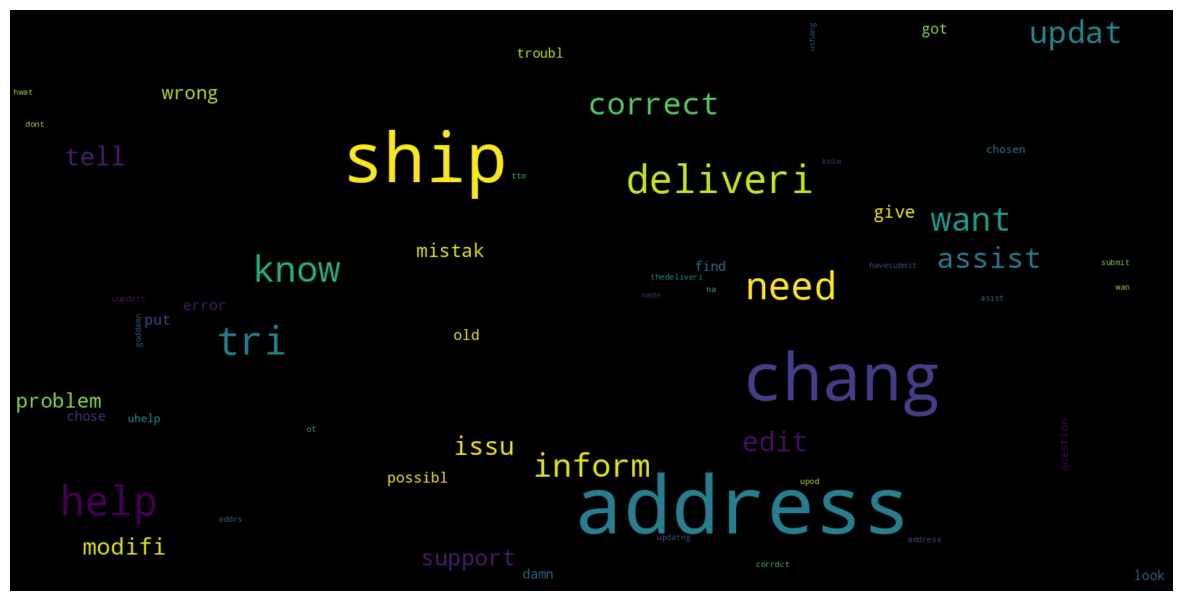

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
consolidated = ' '.join(word for word in df_train['utterance'][df_train['intent']=='change_shipping_address'].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

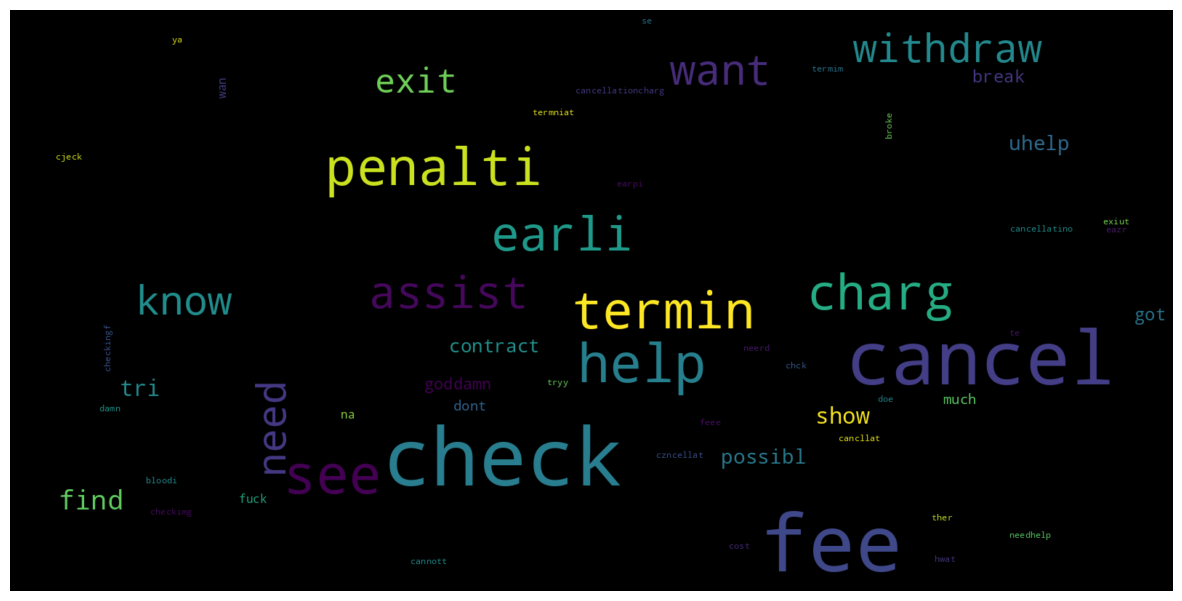

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
consolidated = ' '.join(word for word in df_train['utterance'][df_train['intent']=='check_cancellation_fee'].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

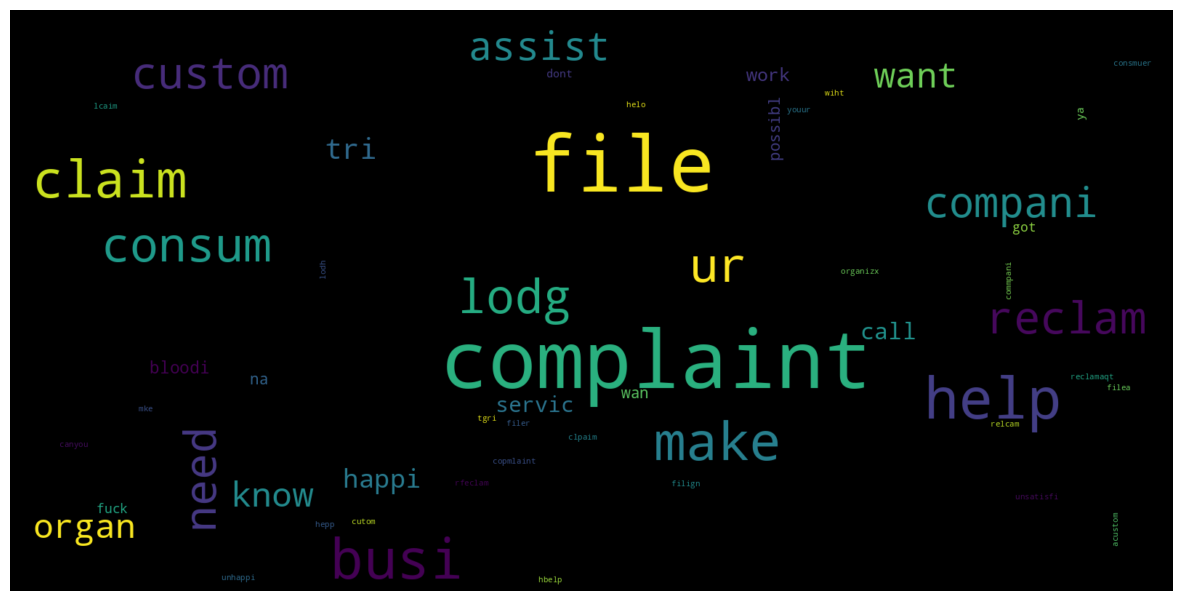

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
consolidated = ' '.join(word for word in df_train['utterance'][df_train['intent']=='complaint'].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

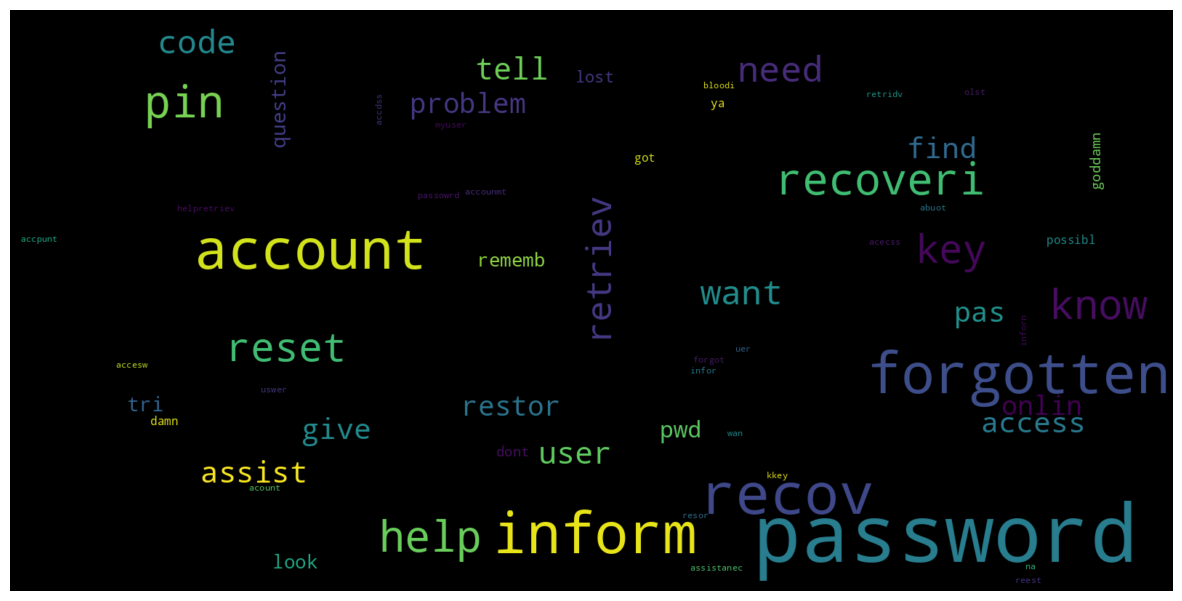

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
consolidated = ' '.join(word for word in df_train['utterance'][df_train['intent']=='recover_password'].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

# **Text_Prediction**

In [113]:
def predict_sentiment(text):
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = tf.keras.utils.pad_sequences(text_seq, maxlen=max_len)

  prediction = model.predict(text_pad).round()
  print(prediction)

  ind=np.argmax(prediction)

  Labels=label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
  print(Labels[ind])

text=	"problem forgotten password"
predict_sentiment([text])

1/1 [==============================] - 0s 63ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]]
recover_password
